In [2]:
""" Dataset utilizado para el arbol de decisión: Red Wine Quality 
Contiene información de 10 clases de calidad del vino """

' Dataset utilizado para la regresión Logistica: Heart Disease Cleveland UCI \nContiene información de pacientes como edad, sexo, presión sanguínea, colesterol, etc. la variable objetivo es la presencia de enfermedad \ncardíaca. '

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Se ingresa la ruta de el archivo y se carga
data = pd.read_csv("./winequality-red.csv")

# Verificar las dimensiones del Dataset resultante
print("Dimensiones del Dataset:", data.shape)


Dimensiones del Dataset: (1599, 12)


In [18]:
# Paso 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

# Mostrar una muestra aleatoria de filas del Dataset
sample_data = data.sample(min(100, len(data)))  # Muestra aleatoria de hasta 100 filas
sample_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1328,6.5,0.520,0.11,1.8,0.073,13.0,38.0,0.99550,3.34,0.52,9.3,5
1412,8.2,0.240,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.9,6
1293,7.5,0.755,0.00,1.9,0.084,6.0,12.0,0.99672,3.34,0.49,9.7,4
909,7.3,0.305,0.39,1.2,0.059,7.0,11.0,0.99331,3.29,0.52,11.5,6
367,10.4,0.575,0.61,2.6,0.076,11.0,24.0,1.00000,3.16,0.69,9.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
443,10.0,0.440,0.49,2.7,0.077,11.0,19.0,0.99630,3.23,0.63,11.6,7
842,10.6,0.500,0.45,2.6,0.119,34.0,68.0,0.99708,3.23,0.72,10.9,6
946,10.2,0.440,0.58,4.1,0.092,11.0,24.0,0.99745,3.29,0.99,12.0,7
1346,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.4,5


In [19]:
data.describe()  # Muestra estadísticas descriptivas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
# Paso 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

# Identificación de valores nulos en el Dataset
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

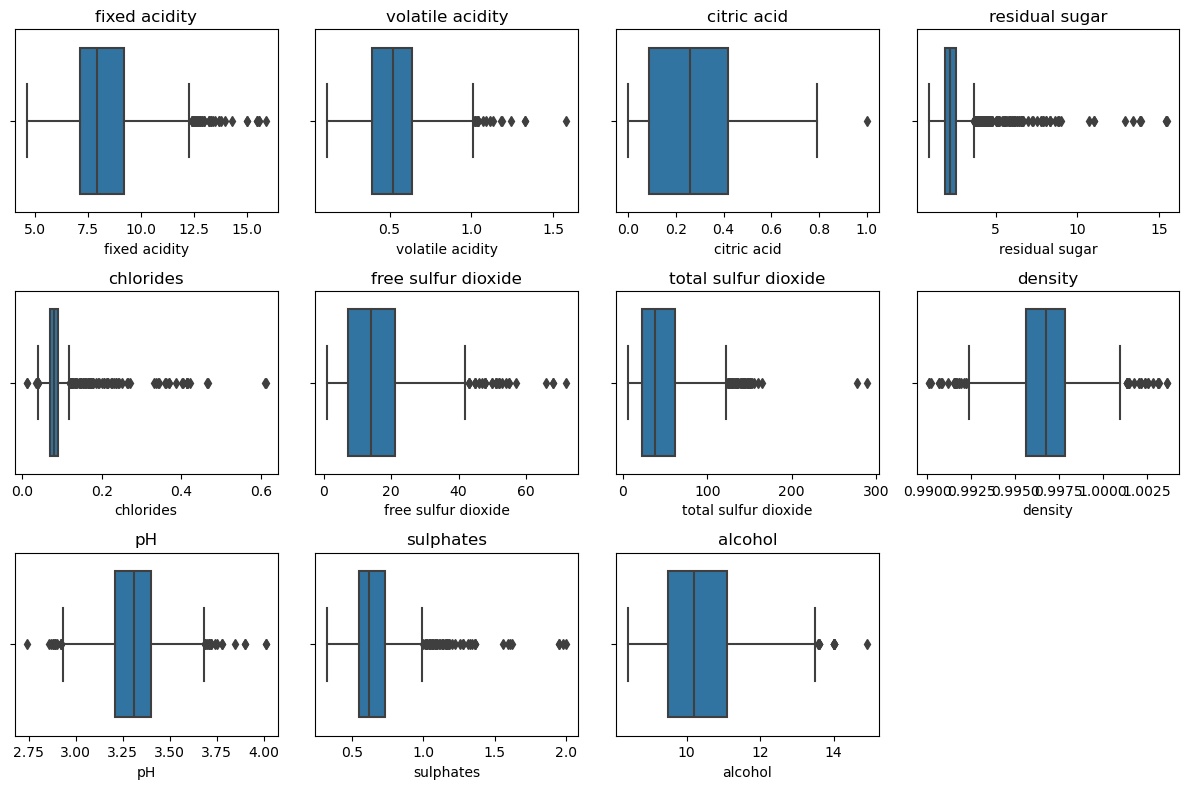

In [21]:
# Identificando datos atipicos 

plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [22]:
# Punto 3. Seleccionar las características más relevantes para entrenar el  modelo utilizando selección de características

# Variable dependiente y necesaria para las predicciones. 
data['quality'].value_counts()
data['quality'].head(30)

0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
20    6
21    5
22    5
23    5
24    6
25    5
26    5
27    5
28    5
29    6
Name: quality, dtype: int64

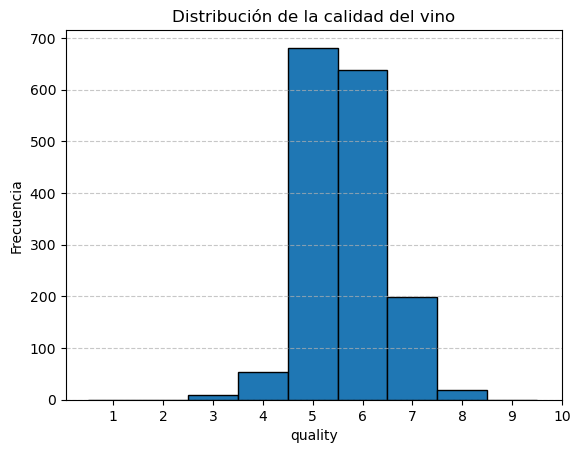

In [23]:
# Histograma de la variable "quality"

plt.hist(data['quality'], bins=range(1, 11), align='left', edgecolor='black')
plt.xlabel('quality')
plt.ylabel('Frecuencia')
plt.title('Distribución de la calidad del vino')
plt.xticks(range(1, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[Text(0.43837068696504994, 0.9761904761904762, 'x[10] <= 10.35\ngini = 0.648\nsamples = 1279\nvalue = [8, 42, 546, 496, 172, 15]'),
 Text(0.22195970042796007, 0.9285714285714286, 'x[9] <= 0.585\ngini = 0.527\nsamples = 703\nvalue = [5, 23, 428, 222, 24, 1]'),
 Text(0.04553762482168331, 0.8809523809523809, 'x[10] <= 9.075\ngini = 0.42\nsamples = 331\nvalue = [3, 15, 242, 69, 2, 0]'),
 Text(0.008559201141226819, 0.8333333333333334, 'x[6] <= 71.0\ngini = 0.587\nsamples = 15\nvalue = [0, 2, 5, 8, 0, 0]'),
 Text(0.005706134094151213, 0.7857142857142857, 'x[7] <= 0.996\ngini = 0.43\nsamples = 11\nvalue = [0, 2, 1, 8, 0, 0]'),
 Text(0.0028530670470756064, 0.7380952380952381, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(0.008559201141226819, 0.7380952380952381, 'x[2] <= 0.55\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 1, 8, 0, 0]'),
 Text(0.005706134094151213, 0.6904761904761905, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 8, 0, 0]'),
 Text(0.011412268188302425, 0.6904761904761

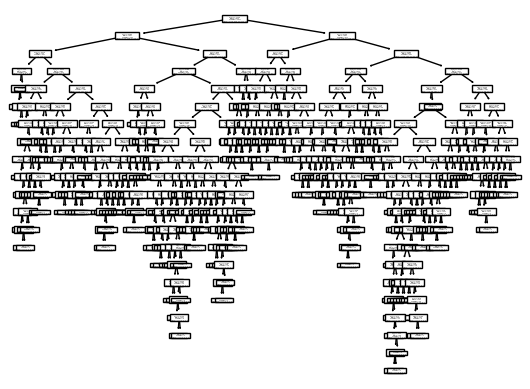

In [25]:
#  Paso 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

# se realiza Train 80%, Y Test 20%

# Preparar los datos de entrada (X) y salida (Y)
X = data.drop("quality",axis=1) # Datos de entrada solo con las características seleccionadas
Y = data["quality"]    # Datos de salida (quality)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

tree = DecisionTreeClassifier()

arbol = tree.fit(X_train, Y_train)
plot_tree(arbol)


In [37]:
# Paso 5. Entrenar el modelo configurando los diferentes hiperparámetros.

# Realizar predicciones con el modelo entrenado sobre el conjunto de prueba
predicciones = arbol.predict(X_test)


In [38]:
# Paso 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

# Crear la tabla de contingencia
tabla_contingencia = pd.crosstab(Y_test.values, predicciones, rownames=["Actual"], colnames=["Predicciones"])

# Mostrar la tabla de contingencia
print(tabla_contingencia)

Predicciones  3  4   5   6   7  8
Actual                           
3             0  0   1   1   0  0
4             1  2   3   5   0  0
5             2  4  96  29   4  0
6             1  3  25  97  14  2
7             0  0   1   4  20  2
8             0  0   0   2   1  0


In [35]:
# Imprimir el informe de clasificación

print("Informe de clasificación en el conjunto de prueba:")
print(classification_report(Y_test, predicciones))


Informe de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.22      0.18      0.20        11
           5       0.76      0.71      0.74       135
           6       0.70      0.68      0.69       142
           7       0.51      0.74      0.61        27
           8       0.00      0.00      0.00         3

    accuracy                           0.67       320
   macro avg       0.37      0.39      0.37       320
weighted avg       0.68      0.67      0.68       320



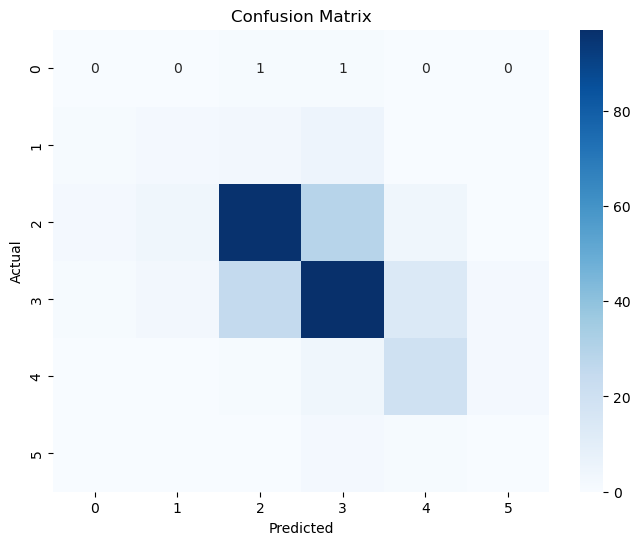

In [46]:
# Paso 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

# Calcula la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)

# Visualiza la matriz de confusión

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


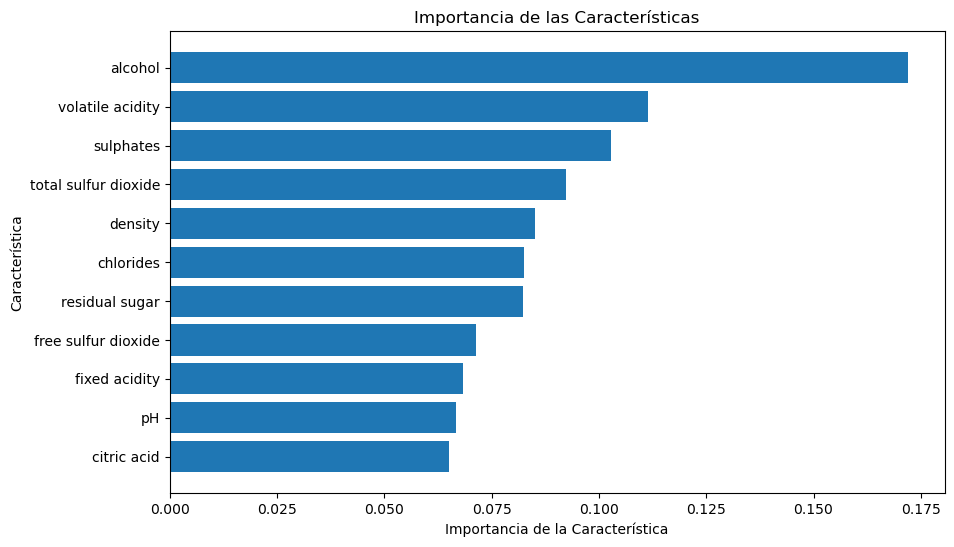

In [53]:
# Obtener la importancia de las características
feature_importance = tree.feature_importances_

# Ordenar las características por importancia
sorted_idx = np.argsort(feature_importance)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel('Importancia de la Característica')
plt.ylabel('Característica')
plt.title('Importancia de las Características')
plt.show()


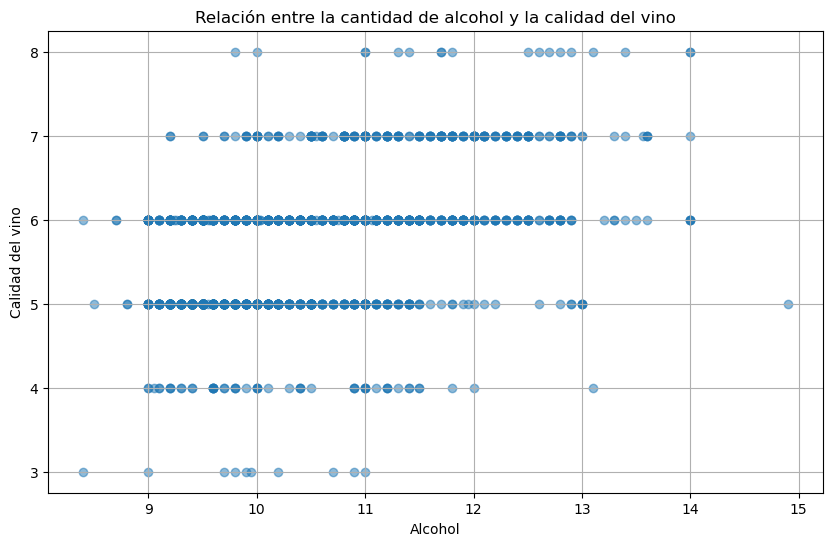

In [57]:
# Gráfico de dispersión de alcohol vs calidad del vino

plt.figure(figsize=(10, 6))
plt.scatter(data['alcohol'], data['quality'], alpha=0.5)
plt.title('Relación entre la cantidad de alcohol y la calidad del vino')
plt.xlabel('Alcohol')
plt.ylabel('Calidad del vino')
plt.grid(True)
plt.show()
